In [ ]:
# STEP 1: Load dataset

import pandas as pd
import numpy as np

df = pd.read_excel('drop_off.xlsx')
df.head()

,Unnamed: 0,user_id,visited,signed_up,added_to_cart,checkout,purchase
0,0,1,1,1,0,0,0
1,1,2,1,1,1,0,0
2,2,3,1,1,1,1,1
3,3,4,1,1,1,0,0
4,4,5,1,0,0,0,0


In [9]:
# STEP 2: DATA CLEANING

# Check missing values
df.isnull().sum()


Unnamed: 0       0
user_id          0
visited          0
signed_up        0
added_to_cart    0
checkout         0
purchase         0
dtype: int64

In [10]:
# Check data types
df.dtypes


Unnamed: 0       int64
user_id          int64
visited          int64
signed_up        int64
added_to_cart    int64
checkout         int64
purchase         int64
dtype: object

In [11]:
# STEP 3: FUNNEL METRICS CALCULATION

funnel_steps = {
    "Visited": df["visited"].sum(),
    "Signed Up": df["signed_up"].sum(),
    "Added to Cart": df["added_to_cart"].sum(),
    "Checkout": df["checkout"].sum(),
    "Purchase": df["purchase"].sum()
}

funnel_df = pd.DataFrame(list(funnel_steps.items()), columns=["Stage", "Users"])
funnel_df


,Stage,Users
0,Visited,1000
1,Signed Up,681
2,Added to Cart,419
3,Checkout,294
4,Purchase,239


In [12]:
# STEP 4: DROP-OFF & CONVERSION RATE

funnel_df["Drop_Off"] = funnel_df["Users"].shift(1) - funnel_df["Users"]
funnel_df["Conversion_Rate_%"] = (funnel_df["Users"] / funnel_df["Users"].shift(1)) * 100
funnel_df.fillna(0, inplace=True)

funnel_df


,Stage,Users,Drop_Off,Conversion_Rate_%
0,Visited,1000,0.0,0.000000
1,Signed Up,681,319.0,68.100000
2,Added to Cart,419,262.0,61.527166
3,Checkout,294,125.0,70.167064
4,Purchase,239,55.0,81.292517


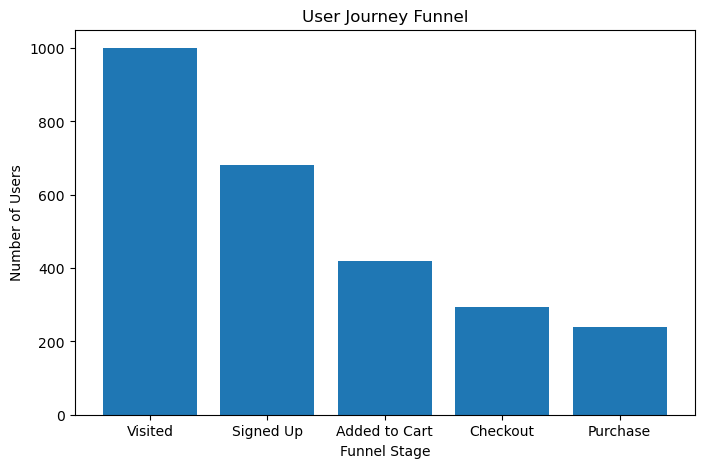

In [14]:
# STEP 5: VISUALIZATION (FUNNEL BAR CHART)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(funnel_df["Stage"], funnel_df["Users"])
plt.title("User Journey Funnel")
plt.xlabel("Funnel Stage")
plt.ylabel("Number of Users")
plt.show()


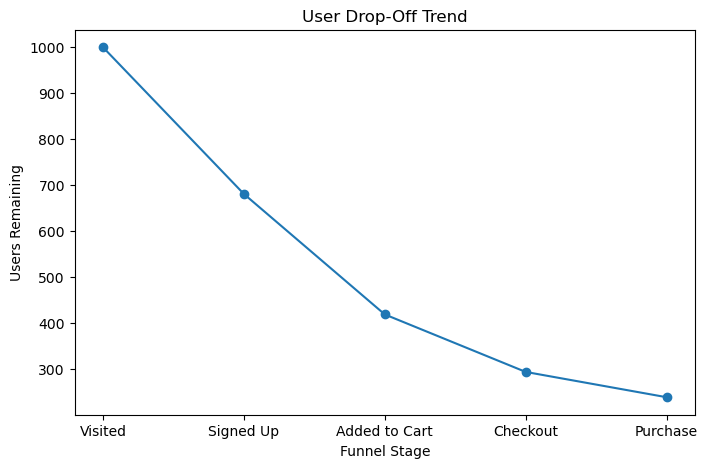

In [15]:
# STEP 6: DROP-OFF VISUALIZATION

plt.figure(figsize=(8,5))
plt.plot(funnel_df["Stage"], funnel_df["Users"], marker='o')
plt.title("User Drop-Off Trend")
plt.xlabel("Funnel Stage")
plt.ylabel("Users Remaining")
plt.show()


In [16]:
# STEP 7: DROP-OFF PERCENTAGE ANALYSIS

funnel_df["Drop_Off_%"] = (funnel_df["Drop_Off"] / funnel_df["Users"].shift(1)) * 100
funnel_df.fillna(0, inplace=True)
funnel_df


,Stage,Users,Drop_Off,Conversion_Rate_%,Drop_Off_%
0,Visited,1000,0.0,0.000000,0.000000
1,Signed Up,681,319.0,68.100000,31.900000
2,Added to Cart,419,262.0,61.527166,38.472834
3,Checkout,294,125.0,70.167064,29.832936
4,Purchase,239,55.0,81.292517,18.707483


In [17]:
# STEP 8: KEY INSIGHTS

highest_drop = funnel_df.loc[funnel_df["Drop_Off_%"].idxmax()]

highest_drop


Stage                Added to Cart
Users                          419
Drop_Off                     262.0
Conversion_Rate_%        61.527166
Drop_Off_%               38.472834
Name: 2, dtype: object

In [ ]:
# 🔑 Insights:

# Maximum drop-off occurs between:
# 👉 Sign Up → Add to Cart

# Indicates:

# Poor onboarding

# Confusing UI

# Low product clarity

In [ ]:
# STEP 9: BUSINESS RECOMMENDATIONS

# 1. Improve onboarding experience
# 2. Add product walkthrough after signup
# 3. Introduce limited-time offers post signup
# 4. Optimize checkout UX
# 5. Reduce steps in payment flow


In [18]:
# STEP 10: SEGMENTED FUNNEL

df["device_type"] = np.random.choice(["Mobile", "Desktop"], n_users, p=[0.6, 0.4])

device_funnel = df.groupby("device_type")[["purchase"]].mean() * 100
device_funnel


,purchase
device_type,
Desktop,23.255814
Mobile,24.306688
